# Drawdowns: Magnitudes and Frequencies

This will be an analysis of the market drawdowns from an empirical perspective, using daily data for the past 24 years.

I will be focusing on the daily returns of the S&P500 index from January 1993 onwards.

The focus on drawdowns is because its is a far more visceral measure of risk than the standard deviation, it's the negative outcome that the investor fundamentally cares about.


In [67]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
df = pd.read_csv("SP500.csv")

Taking a peek, we find the following 

In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.9687,43.9687,43.7500,43.9375,27.607176,1003200
1,1993-02-01,43.9687,44.2500,43.9687,44.2500,27.803539,480500
2,1993-02-02,44.2187,44.3750,44.1250,44.3437,27.862408,201300
3,1993-02-03,44.4062,44.8437,44.3750,44.8125,28.156963,529400
4,1993-02-04,44.9687,45.0937,44.4687,45.0000,28.274775,531500


Get log returns.

In [7]:
df["log_returns"] = np.log(df["Adj Close"]).diff()
df["log_returns"][0] = 0

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,log_returns
0,1993-01-29,43.9687,43.9687,43.7500,43.9375,27.607176,1003200,0.000000
1,1993-02-01,43.9687,44.2500,43.9687,44.2500,27.803539,480500,0.007088
2,1993-02-02,44.2187,44.3750,44.1250,44.3437,27.862408,201300,0.002115
3,1993-02-03,44.4062,44.8437,44.3750,44.8125,28.156963,529400,0.010516
4,1993-02-04,44.9687,45.0937,44.4687,45.0000,28.274775,531500,0.004175


Now we can define drawdown

In [9]:
def drawdown(returns):
    out = []
    cum_returns = [0]
    for i in range(len(returns)):
        cum_returns.append(cum_returns[-1] + returns[i])
        out.append(max(cum_returns)-cum_returns[-1])
    return out


In [45]:
def max_drawdown(drawdowns):
    out = []
    for i in range(len(drawdowns)+1):
        out.append(max(drawdowns[:i+1]))
    return out[:-1]


Lets try it out with some fake data

In [87]:
print(max_drawdown(drawdown([0.05, 0.001, -0.10, 0.002])))
print(drawdown([0.05, 0.001, -0.10, 0.002]))

[0.0, 0.0, 0.1, 0.1]
[0.0, 0.0, 0.1, 0.098]


We can get now get drawdown magnitudes from our returns data

In [48]:
df["drawdown"] = drawdown(df["log_returns"])
df["maxdrawdown"] = max_drawdown(df["drawdown"])

In [49]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,log_returns,drawdown,maxdrawdown
0,1993-01-29,43.9687,43.9687,43.7500,43.9375,27.607176,1003200,0.000000,0.0,0.0
1,1993-02-01,43.9687,44.2500,43.9687,44.2500,27.803539,480500,0.007088,0.0,0.0
2,1993-02-02,44.2187,44.3750,44.1250,44.3437,27.862408,201300,0.002115,0.0,0.0
3,1993-02-03,44.4062,44.8437,44.3750,44.8125,28.156963,529400,0.010516,0.0,0.0
4,1993-02-04,44.9687,45.0937,44.4687,45.0000,28.274775,531500,0.004175,0.0,0.0


Lets have a look at our data

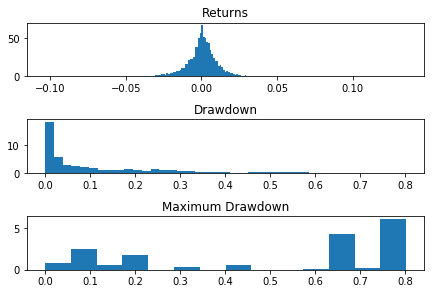

In [92]:
fig, ax = plt.subplots(3)
ax[0].hist(df["log_returns"], bins="auto", normed=True)
ax[0].set_title("Returns")
ax[1].hist(df["drawdown"], bins="auto", normed=True)
ax[1].set_title("Drawdown")
ax[2].hist(df["maxdrawdown"], bins="auto", normed=True)
ax[2].set_title("Maximum Drawdown")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [55]:
def print_moments(data):
    print("Mean: {}".format(data.mean()))
    print("Variance: {}".format(data.var()))
    print("Skewness: {}".format(data.skew()))
    print("Kurtosis: {}".format(data.kurt()))
    

In [56]:
print_moments(df["log_returns"])

Mean: 0.000361076100698
Variance: 0.000134123754915
Skewness: -0.123399178971
Kurtosis: 10.4799642916


In [57]:
print_moments(df["drawdown"])

Mean: 0.121357328453
Variance: 0.0237807139796
Skewness: 1.52946108724
Kurtosis: 1.67269313296


In [58]:
print_moments(df["maxdrawdown"])

Mean: 0.517234819046
Variance: 0.0858882738314
Skewness: -0.499654421501
Kurtosis: -1.46690984604


Now plotting as timeseries, several variables of interest

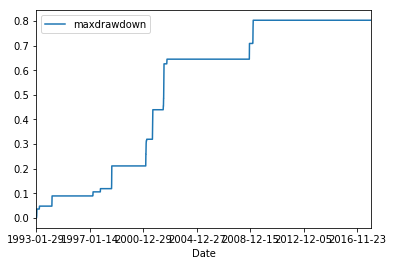

In [64]:
df.plot(x='Date', y='maxdrawdown')

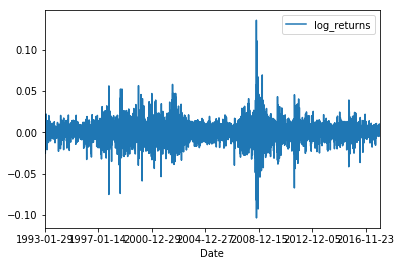

In [65]:
df.plot(x='Date', y='log_returns')

Here we can see that large drawdown spikes happen in 2001 and 2008, corresponding to the tech and the housing bubble

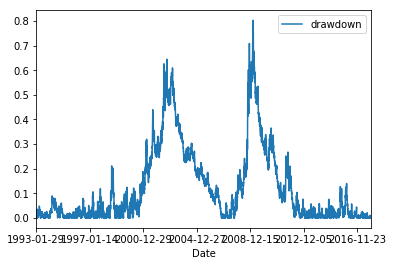

In [66]:
df.plot(x='Date', y='drawdown')

Return multiple over the period

In [70]:
math.pow(1 + df["log_returns"].mean(), len(df["log_returns"]))

9.575486948294436

In [74]:
df["Adj Close"].iloc[-1]/df["Adj Close"].iloc[0]

9.5793930896807407

Omniscient Return over the period

In [86]:

df["abs"] = df["log_returns"].map(math.fabs)
print(df["abs"].mean())
math.pow(1+ df["abs"].mean(), len(df["abs"]))


0.00775197969782


9.70966352989536e+20

A buy and hold position, yields a 9.5X multiple over the 25 year period.

While an omniscient market timer who is long before every up day
and short before ever down day yields a 
9.7*10^20  multiple over the 25 year period.

